In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.pyplot import figure

import matplotlib
import webcolors
from webcolors import *

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 15)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.062017690051863
Iteration  10 : error is  12.449730485855163
Iteration  20 : error is  12.136999122608408
Iteration  30 : error is  12.57011167424971
Iteration  40 : error is  12.675870947421485
Iteration  50 : error is  13.347857902577736
Iteration  60 : error is  12.809908714921704
Iteration  70 : error is  13.262572249487825
Iteration  80 : error is  13.901676778997178
Iteration  90 : error is  13.644394668759977
Iteration  100 : error is  12.514795110621423
Iteration  110 : error is  1.765211805346633
Iteration  120 : error is  1.4368795856579804
Iteration  130 : error is  1.232246461196516
Iteration  140 : error is  1.0927846878953522
Iteration  150 : error is  0.9541246142384707
Iteration  160 : error is  0.7986566313627355
Iteration  170 : error is  0.6900485829655251
Iteration  180 : error is  0.6303123545742291
Iteration  190 : error is  0.59

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

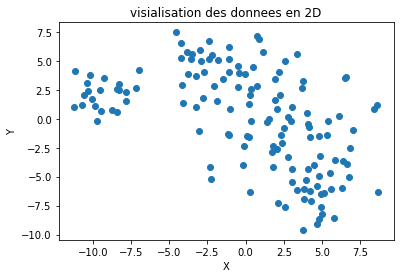

In [3]:
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')
plt.title("visialisation des donnees en 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('../doc/Graphes/visialisation_des_donne_en_2D.png')

In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer plusieurs nombre de clusters et 
#choisir le clustering qui faitle plus de sens pour vous-------------------------------#

#kmeans = KMeans(n_clusters=2, init='k-means++')
#kmeans.fit(data_scaled)
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_2D)

print("Valeur des centre des cluster : les centroïdes \n")
print(kmeans.cluster_centers_) # valeurs des coordonnées centroïdes.

print("\n","#"*32,"Nombre de cluster= ", k, "#"*33, "\n|"," "*85,"|")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
plt.savefig('../doc/Graphes/visialisation_des_4_Cluster.png')

  
for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
        
    colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], k) )
    color_RGB= hex_to_rgb (colore_hex)
    actual_name, colore_name = get_colour_name(color_RGB)
        
    print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    

Valeur des centre des cluster : les centroïdes 

[[ 3.29799279 -0.23514732]
 [-9.2966685   2.14107234]
 [-1.44496879  4.118618  ]
 [ 3.99817904 -5.83078006]]

 ################################ Nombre de cluster=  4 ################################# 
|                                                                                       |
|                    Mexico -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Austria -> centroïdes associer au Cluter N*: 2 color=( dodgerblue)  |
|                   Georgia -> centroïdes associer au Cluter N*: 3 color=( lightgreen)  |
|                    Guinea -> centroïdes associer au Cluter N*: 4 color=( darkorange)  |


<Figure size 432x288 with 0 Axes>

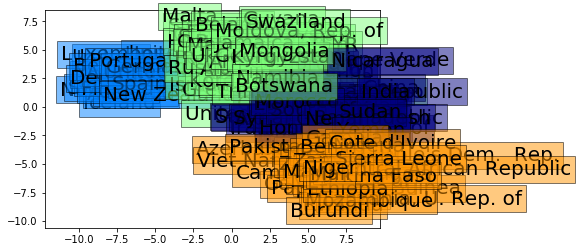

In [5]:
#task_1.2 : affichage du graphe. vous devez réduire la dimensionnalitédes données 
#afin de les visualiser sur l'écran de votre ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)
plt.savefig('../doc/Graphes/visialisation_des_donne_pour_k_fixer_a_4.png')


 ################################## __pour k =  2 __ #################################### 
|                                                                                       |
|                  Paraguay -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                    Poland -> centroïdes associer au Cluter N*: 2 color=( lightgreen)  |

 ################################## __pour k =  3 __ #################################### 
|                                                                                       |
|                  Cameroon -> centroïdes associer au Cluter N*: 1 color=(       navy)  |
|                   Austria -> centroïdes associer au Cluter N*: 2 color=(deepskyblue)  |
|                Kazakhstan -> centroïdes associer au Cluter N*: 3 color=(       gold)  |

 ################################## __pour k =  4 __ #################################### 
|                                                                                       |
|   

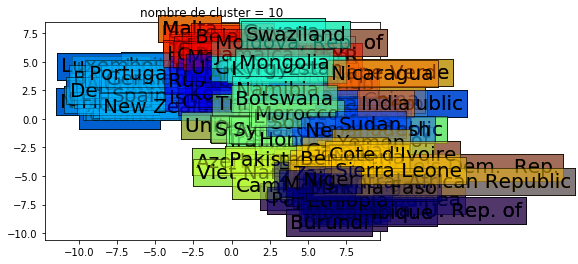

In [183]:
#-------task_2 :Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter


    
SSE = []
for cluster in range(2,11):
    
    cluster_classe = {}
    for i in range(0,cluster):
        cluster_classe[i] = []
    
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_2D)
    SSE.append(kmeans.inertia_)
     
    for i in range(0, len(kmeans.labels_) ):
        cp_liste=[]
        key=kmeans.labels_[i]
        cp_liste = cluster_classe[key]
        cp_liste.append(country_names[i])
        cluster_classe[key] = cp_liste
    
    show_annotated_clustering(data_2D, kmeans.labels_, country_names)
    plt.title("nombre de cluster = "+ str(cluster))
    print("\n","#"*34,"__pour k = ", cluster,"__", "#"*36, "\n|"," "*85,"|")
    plt.savefig('../doc/Graphes/'+str(cluster)+'_Means.png')
    
    centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)
    
    li = 109
    with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
        fichier.write(' '*8 +'Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
        fichier.write("|Cluster_ID |couleur "+" "*3 +"| Taille | Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
            
    for i in range(0, len(index_centroides) ):
        na = index_centroides[i]
        
        colore_hex=matplotlib.colors.to_hex( RGB_color(kmeans.labels_[na], cluster) )
        color_RGB= hex_to_rgb (colore_hex)
        actual_name, colore_name = get_colour_name(color_RGB)
        
        with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'a') as fichier:
            fichier.write("\n|%8s   |%11s|%6s  |%25s|  %50s|" % (i+1,colore_name,len(cluster_classe[i]),country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")
  
        print ("| %25s -> centroïdes associer au Cluter N*:%2s color=(%11s)  |" %(country_names[na] ,i+1, colore_name) )
    

In [174]:
i=4
colore_name='bleu'
na=4
country_names[na]

li = 100
with open('../doc/Graphes/data_'+str(cluster)+'_Means.txt', 'w') as fichier:
    fichier.write(' '*8 +'Repartition des pays dans '+str(cluster)+' cluster \n\n+'+"-"*li +"+\n")
    fichier.write("|Cluster_ID |couleur "+" "*3 +"| Nom Centroide"+" "*10 +" | liste Pays "+" "*38 +"|\n+" +"-"*li +"+\n" )
    fichier.write("|%11s|%11s|%25s|%50s|" % (i,colore_name,country_names[na], cluster_classe[i])+"\n+" +"-"*li +"+")

    

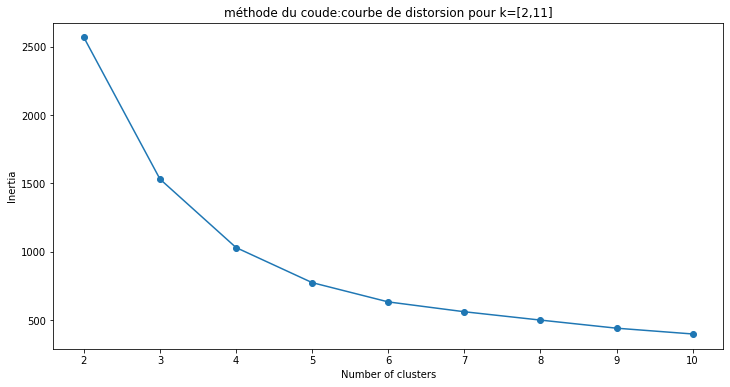

In [7]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("méthode du coude:courbe de distorsion pour k=[2,11]")
plt.savefig('../doc/Graphes/methode_du_coude_courbe_de_distorsion.png')

In [14]:
frame = pd.DataFrame(data_2D)
frame['cluster'] = kmeans.predict(data_2D)

frame['cluster'].value_counts()


3    22
0    19
4    17
1    16
5    14
6    13
7    12
8    10
2     9
9     6
Name: cluster, dtype: int64

In [16]:
frame['cluster'].value_counts()[0]

19

In [17]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 1, 3, 8, 1, 1, 6, 1, 4, 1, 8, 6, 1, 1, 1, 4, 1, 1, 8, 2,
       4, 1, 2, 8, 2, 1, 6, 8, 1, 1, 1, 4, 5, 5, 2, 6, 2, 1, 4, 6, 8, 9,
       5, 5, 4, 4, 8, 8, 5, 9, 4, 4, 6, 5, 6, 5, 4, 5, 6, 6, 9, 5, 4, 5,
       6, 4, 9, 6, 5, 6, 5, 4, 4, 4, 0, 8, 9, 5, 8, 7, 5, 0, 4, 4, 0, 9,
       0, 7, 0, 0, 7, 6, 7, 0, 7, 7, 0, 7, 0, 7, 0, 7, 7, 0, 0, 0, 0, 0,
       0, 7, 0, 0, 7, 0], dtype=int32)

In [137]:
cluster_classe = {}
for i in range(0,10):
    cluster_classe[i] = []

for i in range(0, len(kmeans.labels_) ):
    cp_liste=[]
    key=kmeans.labels_[i]
    cp_liste = cluster_classe[key]
    cp_liste.append(country_names[i])
    cluster_classe[key] = cp_liste


In [109]:
cluster_classe.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [132]:
len(cluster_classe[3])

22

In [181]:
len(cluster_classe[1])

14

In [75]:
mon_dictionnaire = {}
x=[]
mon_dictionnaire["pseudo"] = ["Prolixe","Prolixe3", "Prolixe4"]

x =  mon_dictionnaire["pseudo"]
df='dff'
x.append(df)
mon_dictionnaire["pseudo"]=x

y=[]
y.append(df)


In [77]:
y

['dff']

In [41]:
x=()
x = ('abve', 'uhtr', 'ijtv')
x + ('derf',)

('abve', 'uhtr', 'ijtv', 'derf')